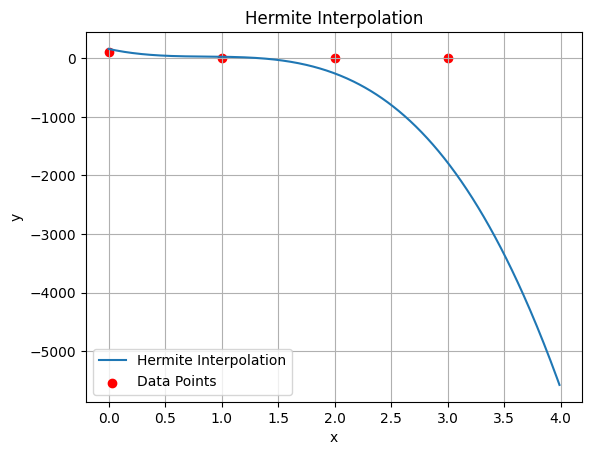

In [2]:
import matplotlib.pyplot as plt

def hermite_interpolation(x, y, dydx, x_interp):
    
    n = len(x)
    p_interp = []
    
    for xi in x_interp:
        p = 0
        for i in range(n):
            h00 = (1 - 2*(xi - x[i])/(x[(i+1)%n] - x[i])) * ((xi - x[(i+1)%n])/(x[i] - x[(i+1)%n]))**2
            h01 = (1 - 2*(xi - x[(i+1)%n])/(x[i] - x[(i+1)%n])) * ((xi - x[i])/(x[(i+1)%n] - x[i]))**2
            h10 = (xi - x[i]) * ((xi - x[(i+1)%n])/(x[i] - x[(i+1)%n]))**2
            h11 = (xi - x[(i+1)%n]) * ((xi - x[i])/(x[(i+1)%n] - x[i]))**2
            p += y[i]*h00 + y[(i+1)%n]*h01 + dydx[i]*h10 + dydx[(i+1)%n]*h11
        p_interp.append(p)
    
    return p_interp

# Sample data points
x = [0, 1, 2, 3]
y = [100, 2, 3, 4]
dydx = [2, 3, 2, 5]  # Example values of dy/dx

# Generate points for plotting
x_interp = [i/100 for i in range(400)]
y_interp = hermite_interpolation(x, y, dydx, x_interp)

# Plotting
plt.plot(x_interp, y_interp, label='Hermite Interpolation')
plt.scatter(x, y, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hermite Interpolation')
plt.legend()
plt.grid(True)
plt.show()
